In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [27]:
folder_template = "improved_end_A/results/none/"
type_name = "none"
file_path = folder_template + f"resultsGA_{type_name}.csv"
data_frame = pd.read_csv(file_path)

# Display the first few rows
data_frame.head()

,type,measured_time,variable_number,clauses_number,average_error,best_fitness_error,population_size,tournament_size,num_elites,num_generations,parameter_changed,max_attempts,mutation_rate,crossover_rate
0,A,1312359,100,430,0,0,500,2,2,300,none,50,0.05,0.9


In [28]:
# display "type, variable_number, clauses_nuber, measured_time"
selected_columns = data_frame[['type', 'variable_number', 'clauses_number', 'measured_time']]
selected_columns.to_csv(folder_template + 'selected_columns.csv', index=False)

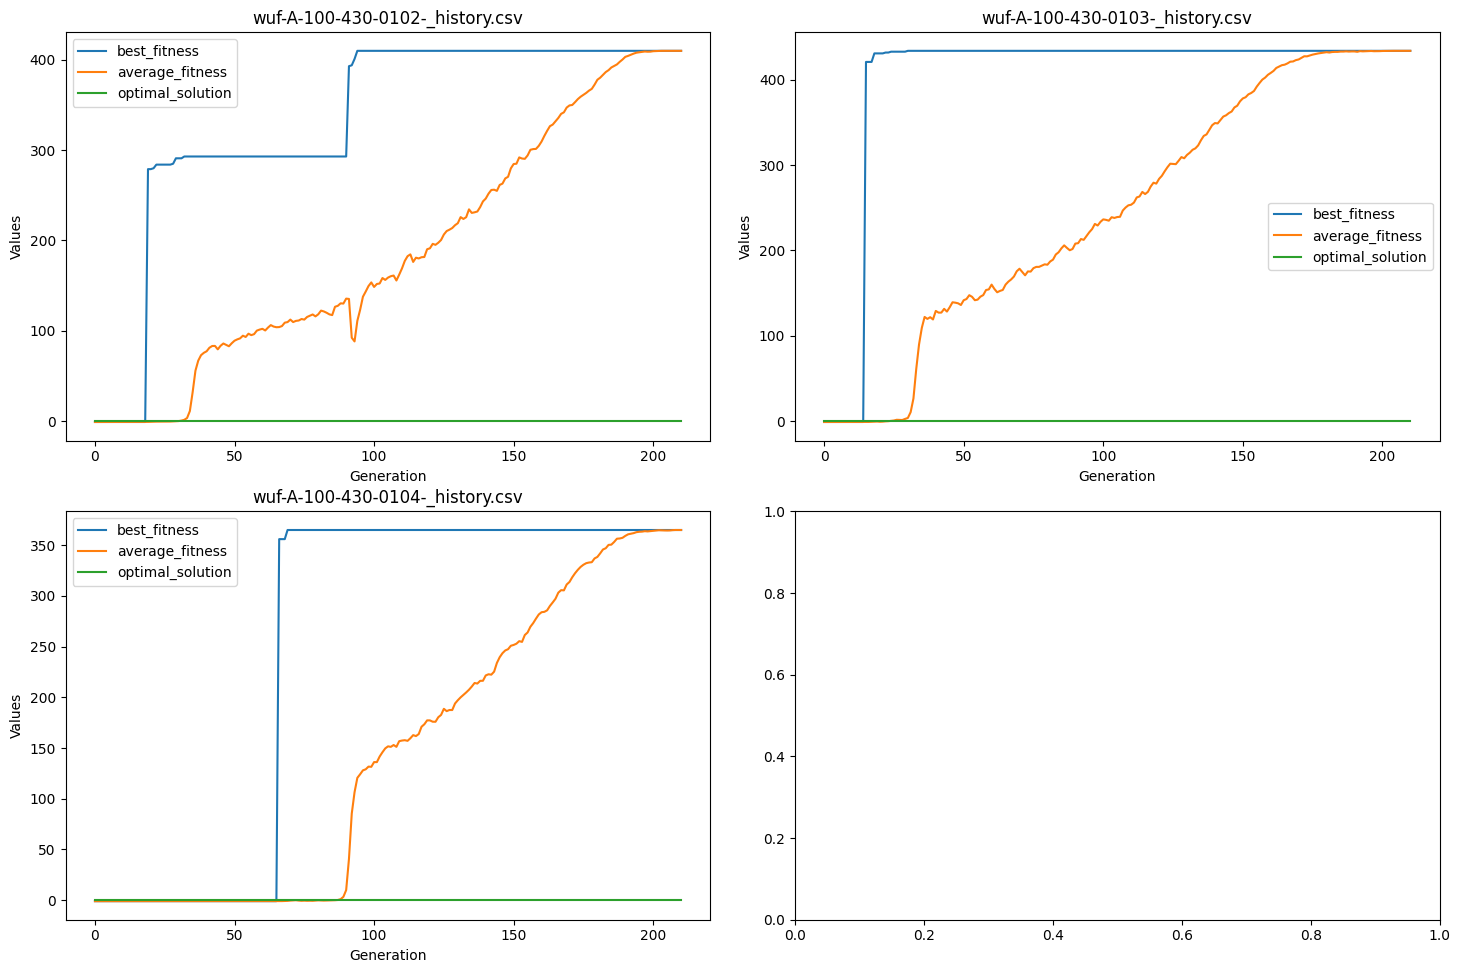

In [29]:
# Get all CSV files in the directory
csv_files = glob.glob(folder_template + 'measurements/*.csv')

n_rows = 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.tight_layout(pad=3.0)

for idx, file in enumerate(csv_files):
    # Convert single index to row, col indices
    row = idx // n_cols
    col = idx % n_cols

    file_name = file.split('\\')[-1]
    type_value = file_name.split('-')[-1].split('_')[0]

    data = pd.read_csv(file)

    # Plot on the corresponding subplot
    axes[row, col].plot(data['generation'], data['best_fitness'], label='best_fitness')
    axes[row, col].plot(data['generation'], data['average_fitness'], label='average_fitness')
    axes[row, col].plot(data['generation'], data['optimal_solution'], label='optimal_solution')

    # Add labels and legend
    axes[row, col].set_xlabel('Generation')
    axes[row, col].set_ylabel('Values')
    axes[row, col].legend()
    axes[row, col].set_title(f'{file_name}')
    #axes[row, col].set_title(f'{type_name} = {type_value}')

plt.savefig(folder_template + 'plot.png')
plt.show()

In [30]:
# # Get all CSV files in the directory
# csv_files = glob.glob(folder_template + 'measurements/*.csv')
# 
# plt.figure(figsize=(15, 10))
# best_average = []
# 
# for file in csv_files:
#     file_name = file.split('\\')[-1]
#     type_value = file_name.split('-')[-1].split('_')[0]
# 
#     data = pd.read_csv(file)
# 
#     # Plot average_fitness on the same plot
#     plt.plot(data['generation'], data['average_fitness'], label=f'{type_name} = {type_value}')
#     #plt.plot(data['generation'], data['best_fitness'])
#     # print last "average_fitness" value
#     best_average.append(data["best_fitness"].iloc[-1])
# 
# # save best average values
# best_average_df = pd.DataFrame(best_average, columns=["best_average"])
# best_average_df.to_csv(folder_template + 'best_average.csv', index=False)
# 
# # Add labels and legend
# plt.xlabel('Generation')
# plt.ylabel('Average Fitness')
# plt.legend()
# plt.title('Average Fitness over Generations for Different Types')
# 
# plt.savefig(folder_template + 'average_fitness_plot.png')
# plt.show()